EII4220 – Introducción a Data Science

Proyecto Diabetes Prediction

Nombres: Benjamin Sanchez, Carla Vidal, Miguel Vidal

In [1]:
from google.colab import files
import numpy as np
import pandas as pd

uploaded = files.upload()
mydata = pd.read_csv('diabetes.csv')



Saving diabetes.csv to diabetes.csv


In [ ]:
mydata.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
mydata.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Descripción tabular de los datos



In [ ]:
mydata.describe(include="all")



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Si bien al usar mydata.isnull().sum(), arrojó que no hay espacios nulos, identificamos al usar mydata.describe() que el minimo en los atributos Glucose, BloodPressure, SkinThickness, Insulin y BMI es 0, cosa que no es posible en la realidad por lo que lo asociamos a que es un dato faltante. Para este caso se ha decidido reemplazar estos datos por la mediana, el motivo de no usar la media es por los valores aberrantes y para no alterar los futuros resultados para los que se usará la base de datos. La elección de la mediana responde a su menor sensibilidad a valores atípicos, los
cuales son frecuentes en datos de salud y pueden distorsionar la representación central de la variable si
se utiliza la media. Este enfoque es útil para asegurar que el análisis no se vea afectado por valores
extremos que puedan influir de manera desproporcionada en las predicciones del modelo. Si bien existen
técnicas de imputación avanzadas, como imputación múltiple o algoritmos basados en K-Nearest
Neighbors, se optó por la mediana para simplificar el proceso en este proyecto de introducción. Esto no
descarta la posibilidad de usar métodos más sofisticados en futuros estudios para lograr una imputación
más precisa.


In [2]:
# Imputar los valores de 0 con la mediana en las columnas específicas
mydata['Glucose'] = mydata['Glucose'].replace(0, mydata['Glucose'].median())
mydata['BloodPressure'] = mydata['BloodPressure'].replace(0, mydata['BloodPressure'].median())
mydata['SkinThickness'] = mydata['SkinThickness'].replace(0, mydata['SkinThickness'].median())
mydata['Insulin'] = mydata['Insulin'].replace(0, mydata['Insulin'].median())
mydata['BMI'] = mydata['BMI'].replace(0, mydata['BMI'].median())


In [3]:
mydata.describe(include="all")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Histogramas


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

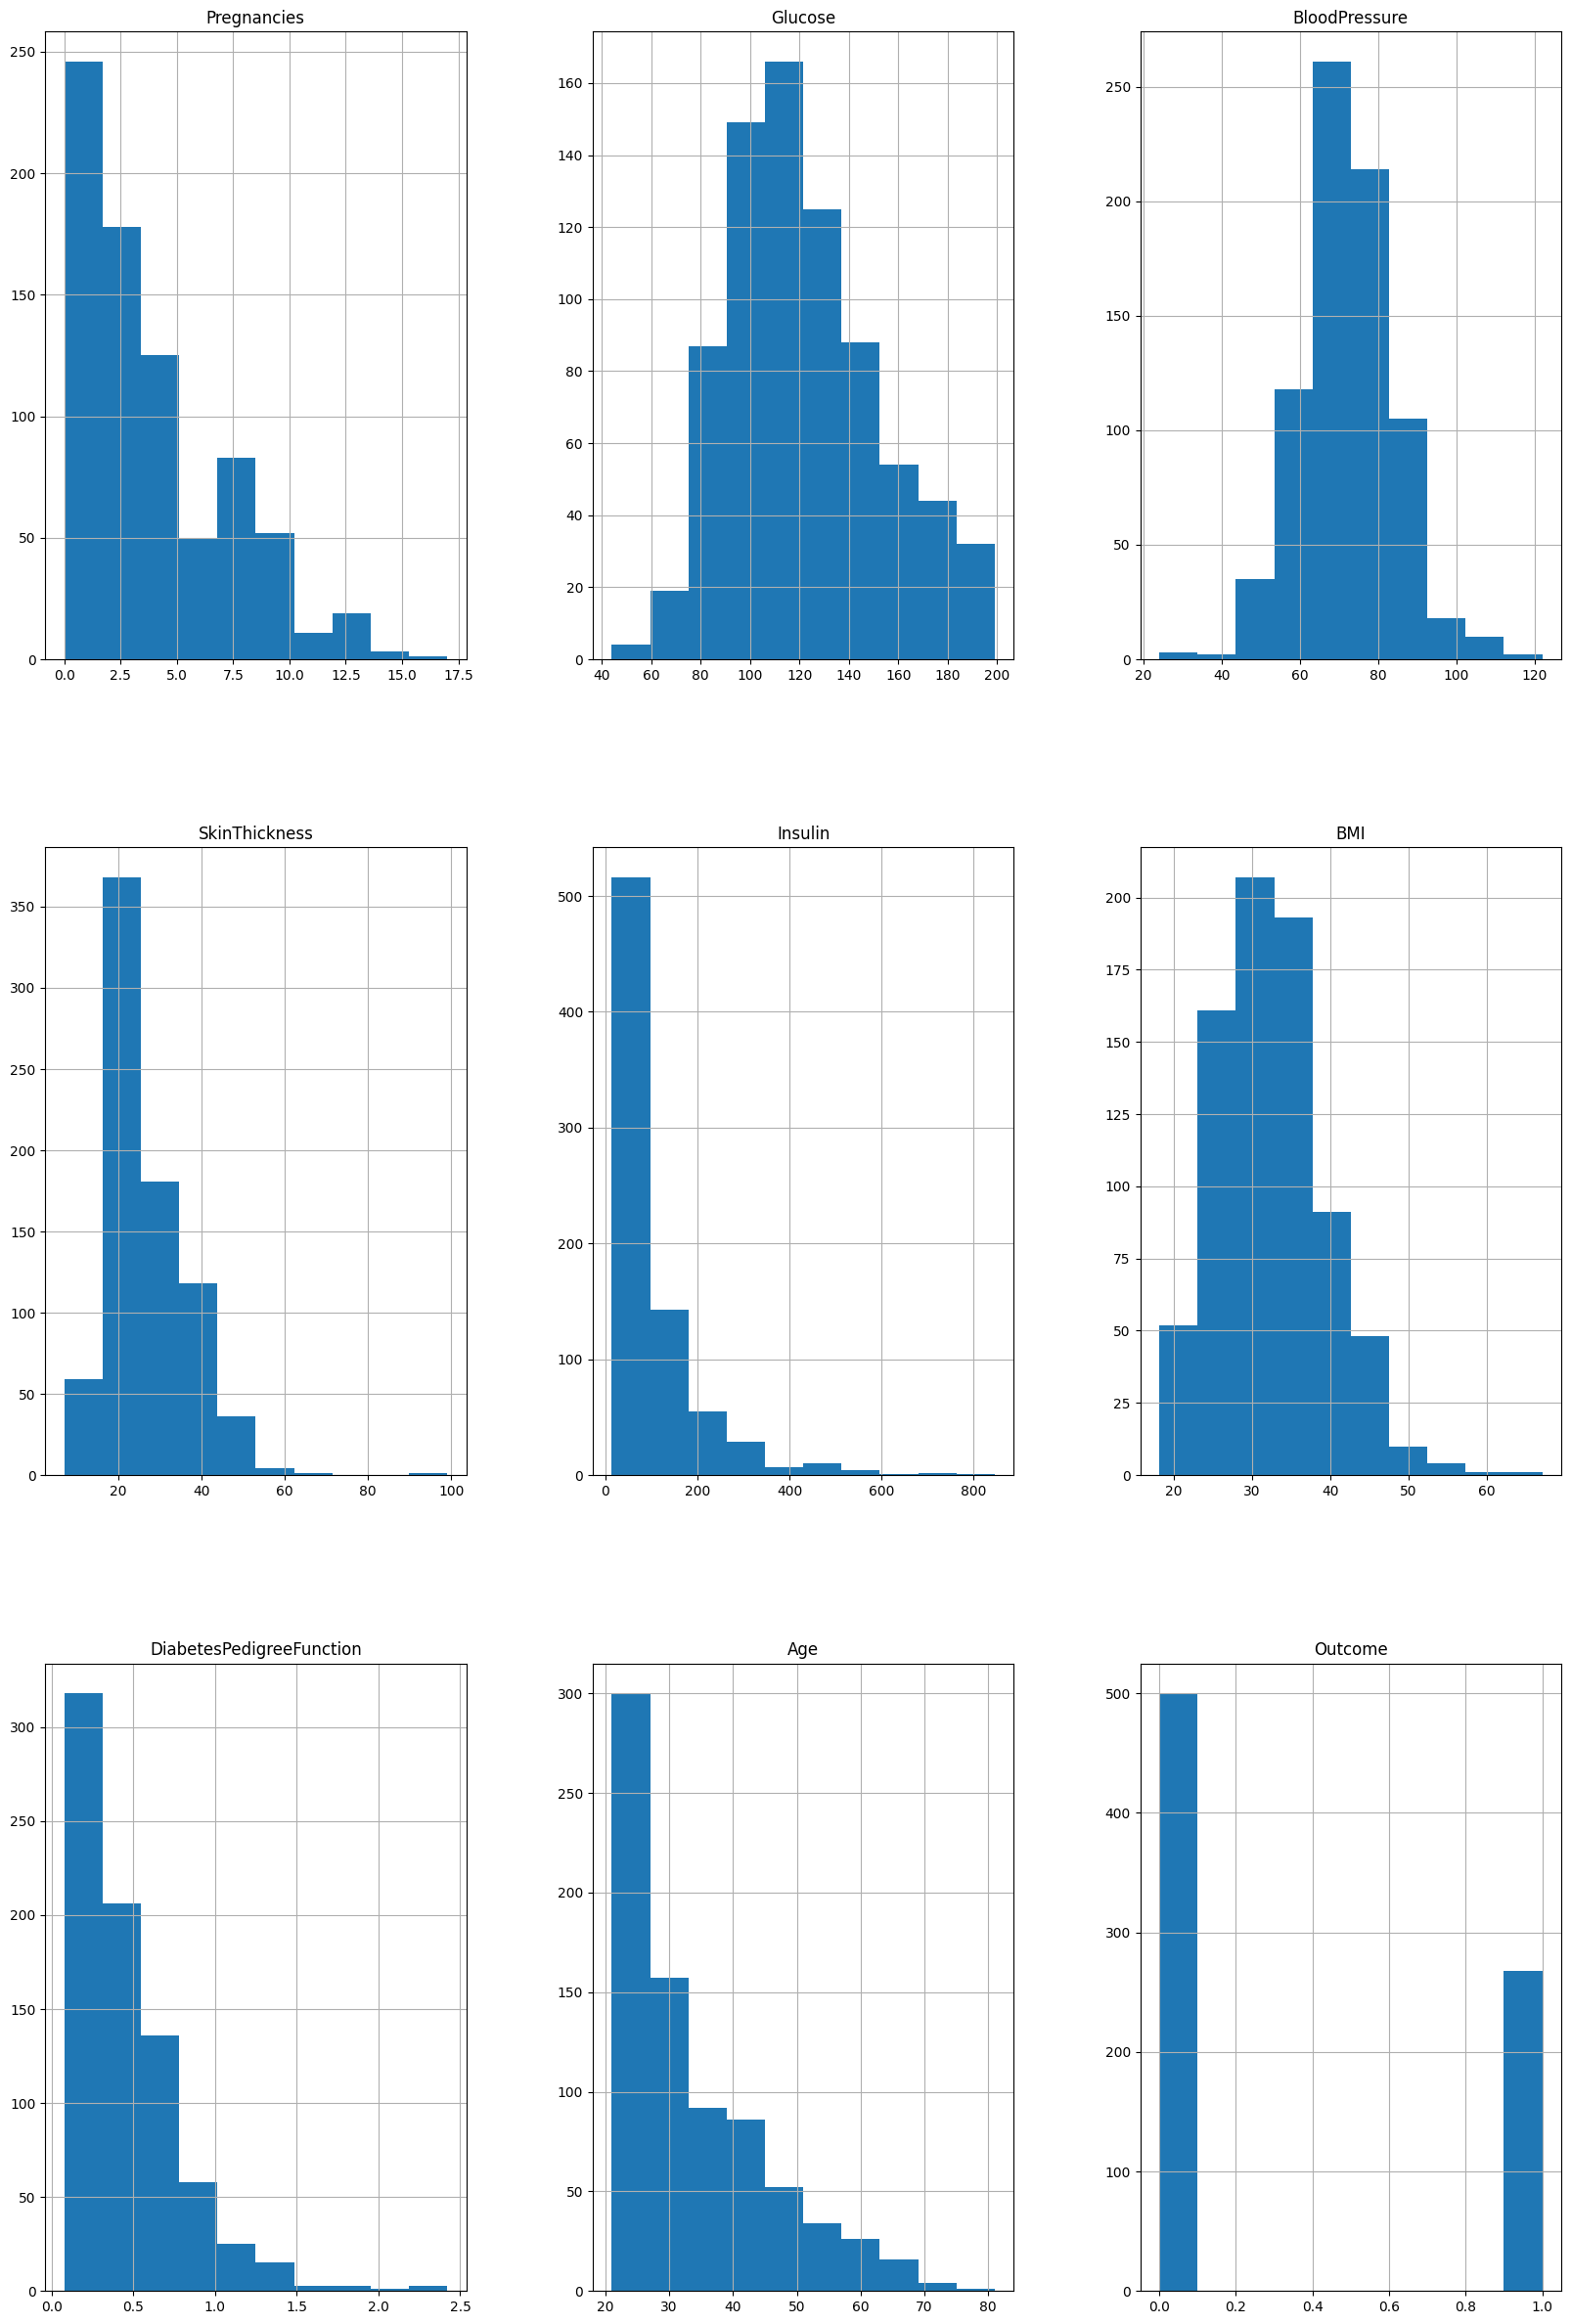

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
mydata.hist(figsize=(20,30))

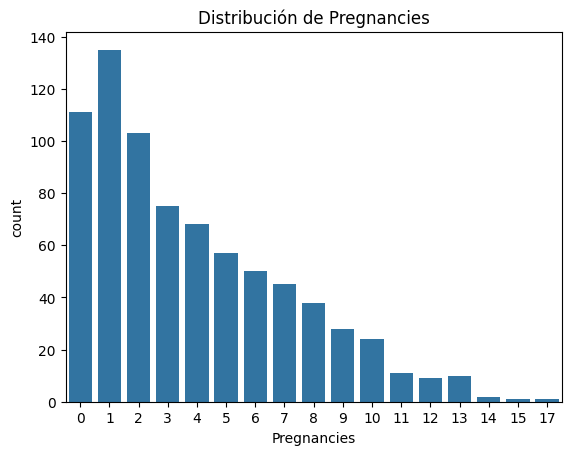

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Pregnancies', data=mydata)
plt.title('Distribución de Pregnancies')
plt.show()


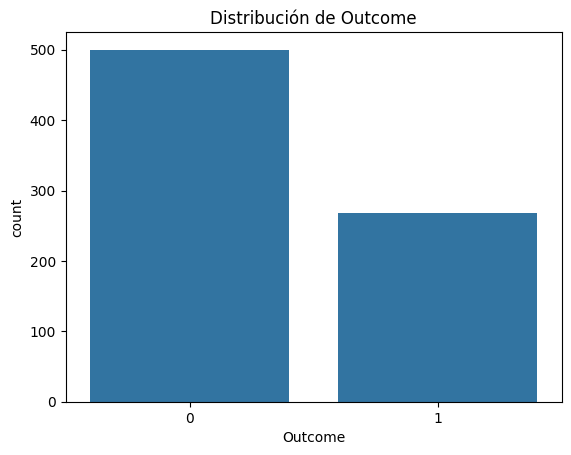

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Outcome', data=mydata)
plt.title('Distribución de Outcome')
plt.show()

# Boxplots

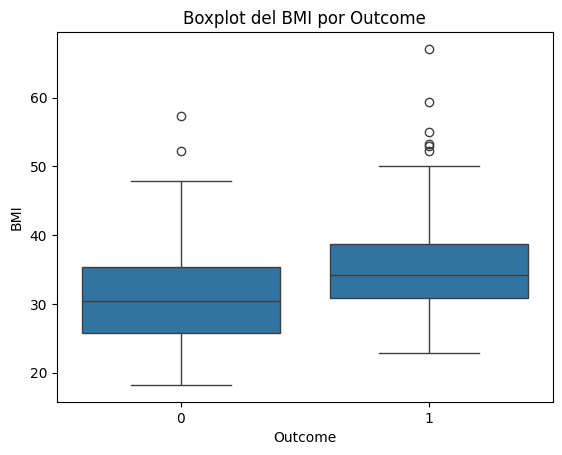

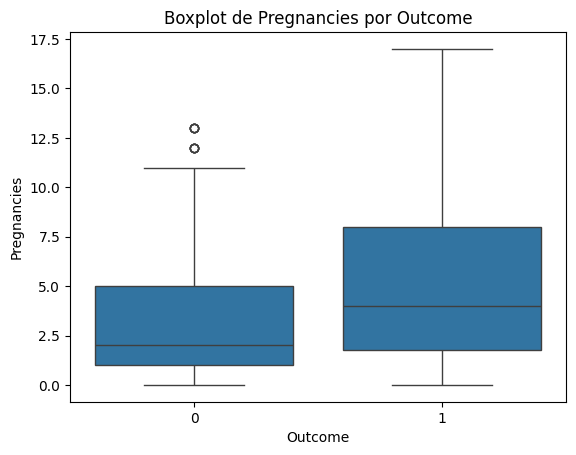

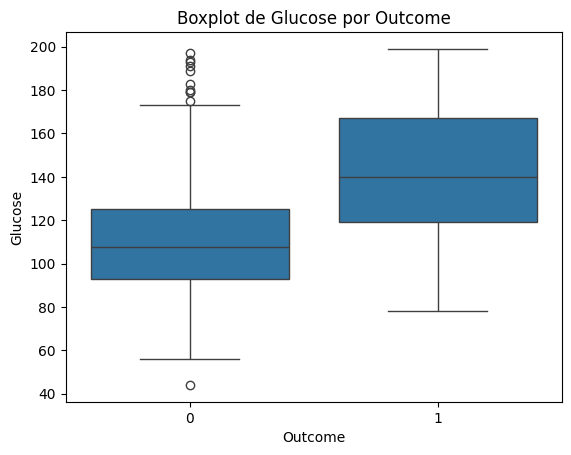

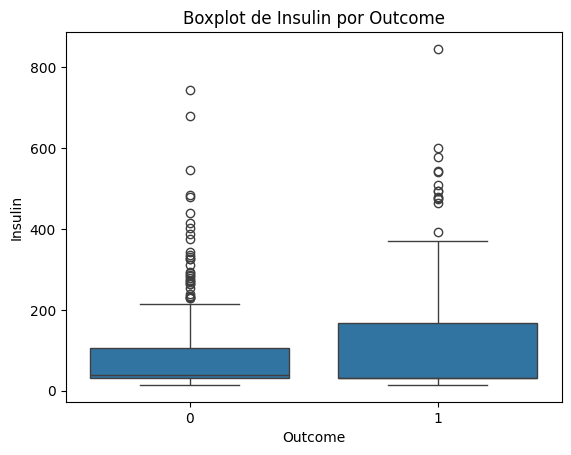

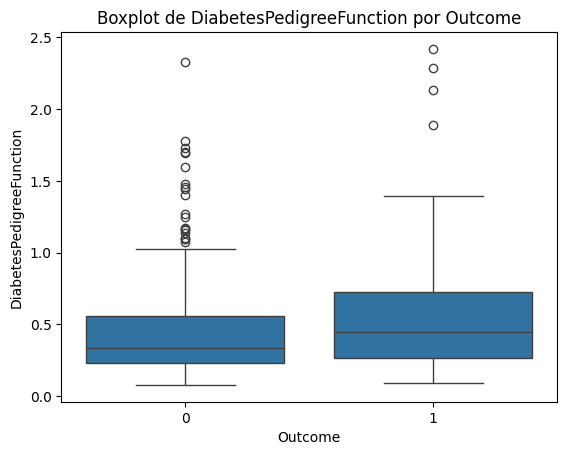

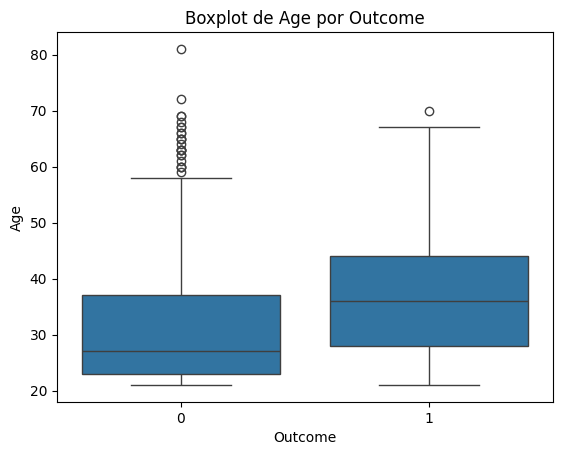

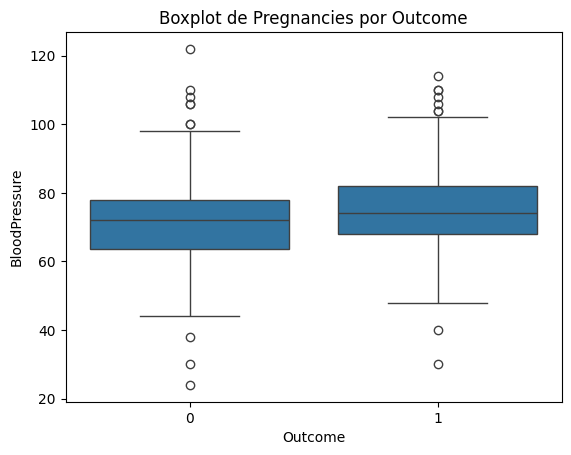

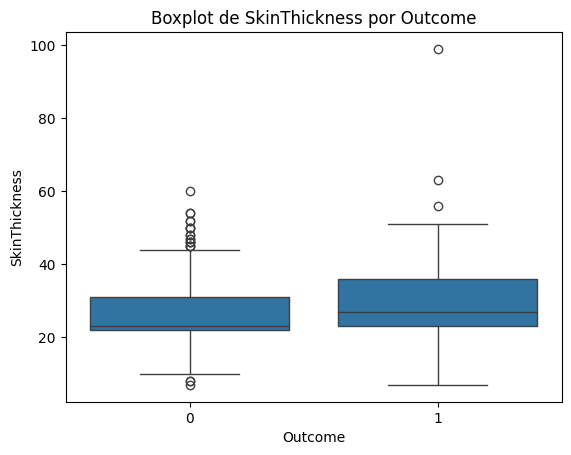

In [8]:
sns.boxplot(x='Outcome', y='BMI', data=mydata)
plt.title('Boxplot del BMI por Outcome')
plt.show()

sns.boxplot(x='Outcome', y='Pregnancies', data=mydata)
plt.title('Boxplot de Pregnancies por Outcome')
plt.show()

sns.boxplot(x='Outcome', y='Glucose', data=mydata)
plt.title('Boxplot de Glucose por Outcome')
plt.show()

sns.boxplot(x='Outcome', y='Insulin', data=mydata)
plt.title('Boxplot de Insulin por Outcome')
plt.show()

sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=mydata)
plt.title('Boxplot de DiabetesPedigreeFunction por Outcome')
plt.show()

sns.boxplot(x='Outcome', y='Age', data=mydata)
plt.title('Boxplot de Age por Outcome')
plt.show()

sns.boxplot(x='Outcome', y='BloodPressure', data=mydata)
plt.title('Boxplot de Pregnancies por Outcome')
plt.show()

sns.boxplot(x='Outcome', y='SkinThickness', data=mydata)
plt.title('Boxplot de SkinThickness por Outcome')
plt.show()



## Matriz de correlacion

In [9]:
correlation = mydata[['Outcome', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',  'BMI', 'DiabetesPedigreeFunction', 'Age']].corr().iloc[0,1]
print( mydata[['Outcome', 'Pregnancies']].corr())

print( mydata[['Outcome', 'Glucose']].corr())

print( mydata[['Outcome', 'BloodPressure']].corr())

print( mydata[['Outcome', 'SkinThickness']].corr())

print( mydata[['Outcome', 'Insulin']].corr())

print( mydata[['Outcome', 'BMI']].corr())

print( mydata[['Outcome', 'DiabetesPedigreeFunction']].corr())

print( mydata[['Outcome', 'Age']].corr())





              Outcome  Pregnancies
Outcome      1.000000     0.221898
Pregnancies  0.221898     1.000000
          Outcome   Glucose
Outcome  1.000000  0.492782
Glucose  0.492782  1.000000
                Outcome  BloodPressure
Outcome        1.000000       0.165723
BloodPressure  0.165723       1.000000
                Outcome  SkinThickness
Outcome        1.000000       0.189065
SkinThickness  0.189065       1.000000
          Outcome   Insulin
Outcome  1.000000  0.148457
Insulin  0.148457  1.000000
          Outcome       BMI
Outcome  1.000000  0.312249
BMI      0.312249  1.000000
                           Outcome  DiabetesPedigreeFunction
Outcome                   1.000000                  0.173844
DiabetesPedigreeFunction  0.173844                  1.000000
          Outcome       Age
Outcome  1.000000  0.238356
Age      0.238356  1.000000


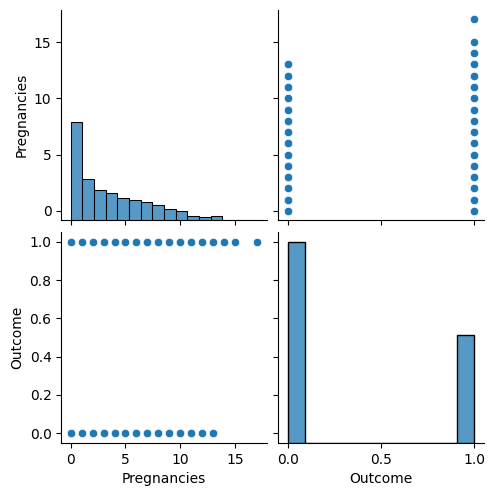

             Pregnancies   Outcome
Pregnancies     1.000000  0.221898
Outcome         0.221898  1.000000


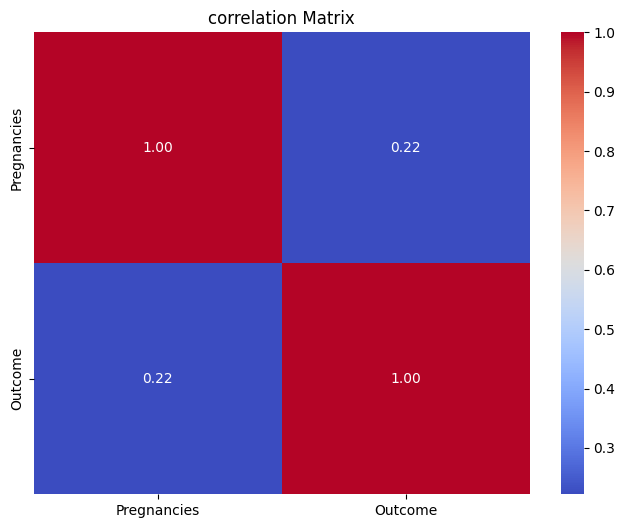

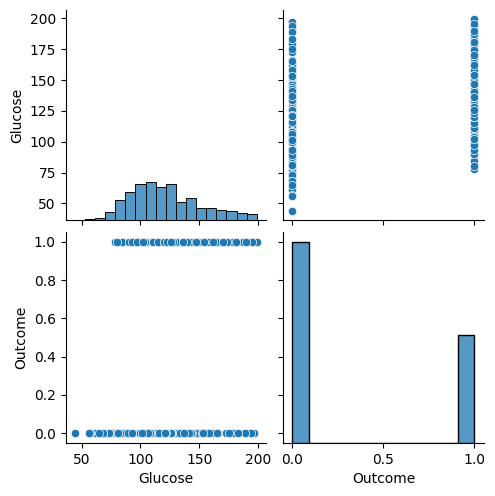

          Glucose   Outcome
Glucose  1.000000  0.492782
Outcome  0.492782  1.000000


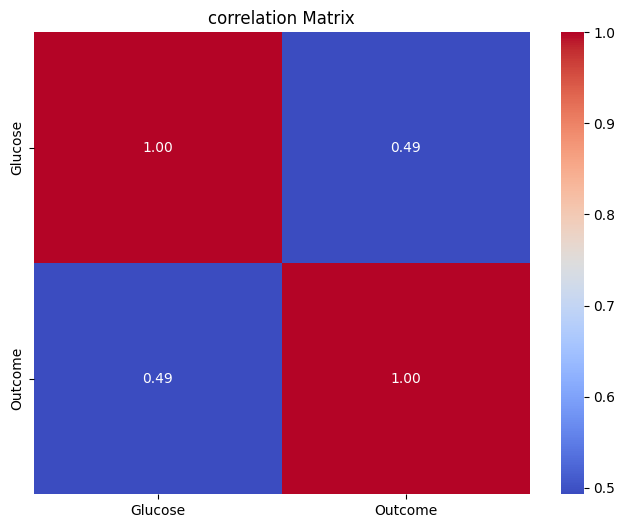

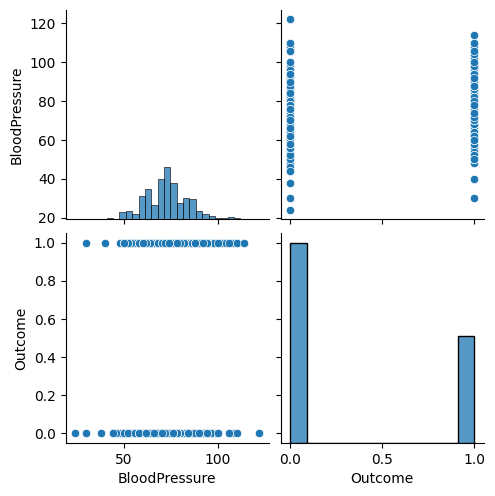

               BloodPressure   Outcome
BloodPressure       1.000000  0.165723
Outcome             0.165723  1.000000


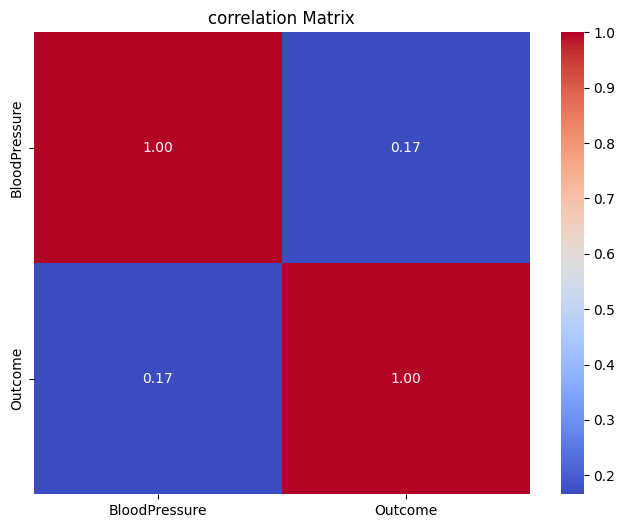

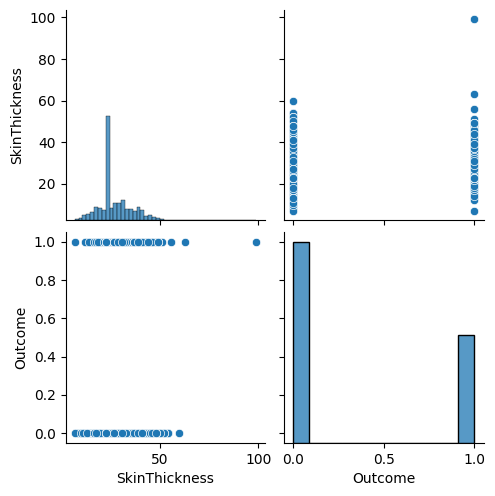

               SkinThickness   Outcome
SkinThickness       1.000000  0.189065
Outcome             0.189065  1.000000


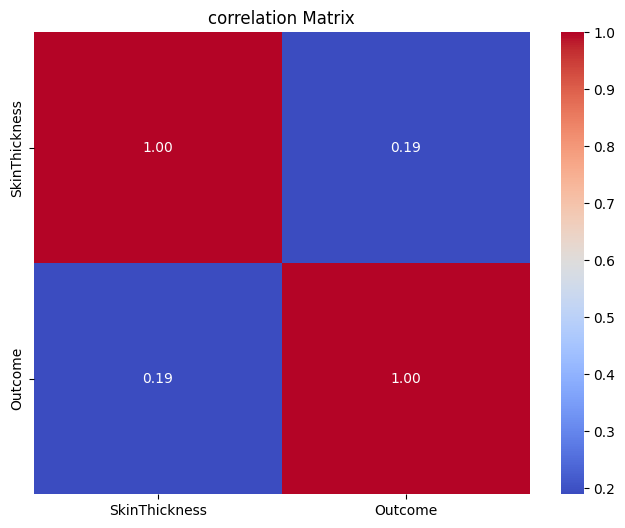

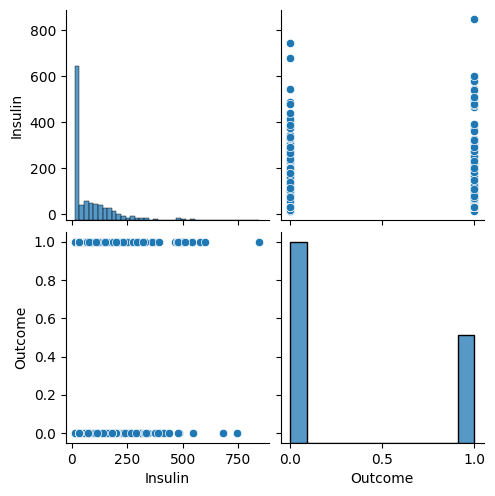

          Insulin   Outcome
Insulin  1.000000  0.148457
Outcome  0.148457  1.000000


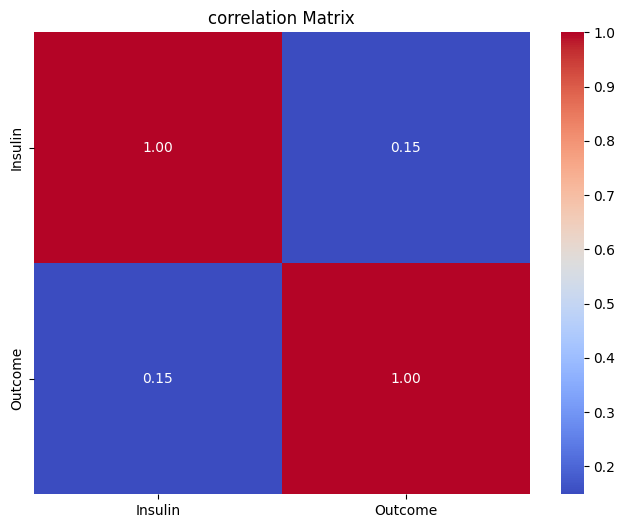

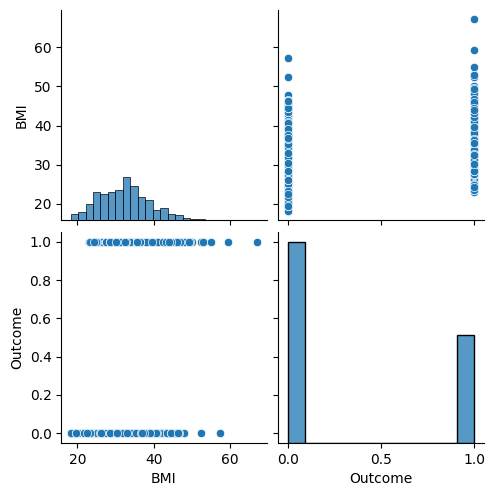

              BMI   Outcome
BMI      1.000000  0.312249
Outcome  0.312249  1.000000


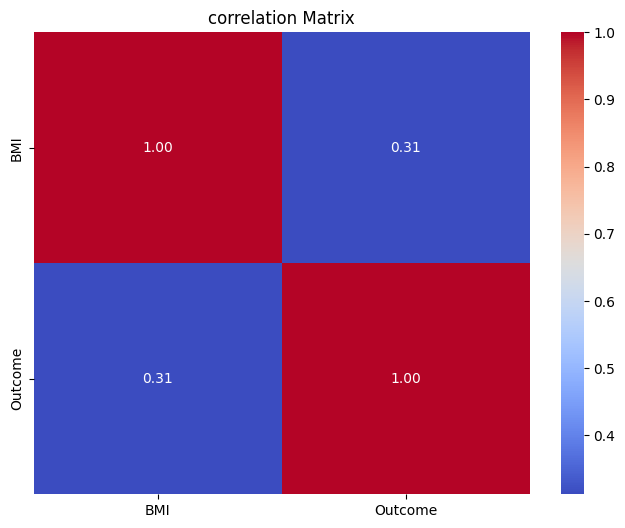

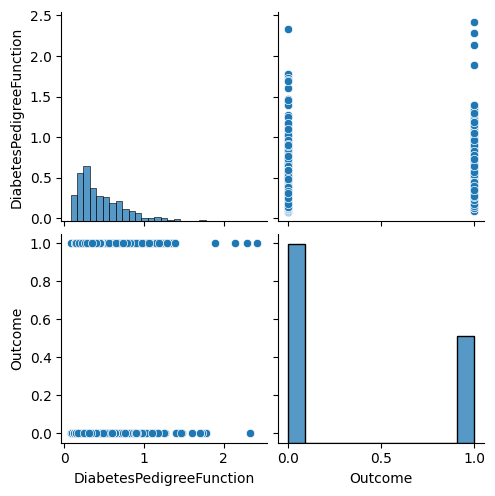

                          DiabetesPedigreeFunction   Outcome
DiabetesPedigreeFunction                  1.000000  0.173844
Outcome                                   0.173844  1.000000


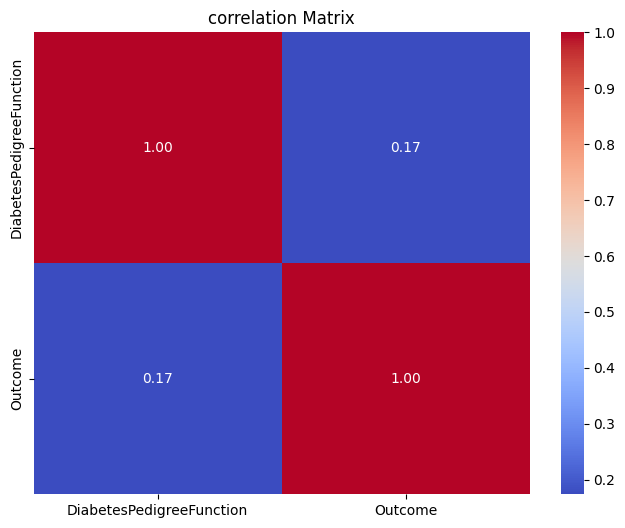

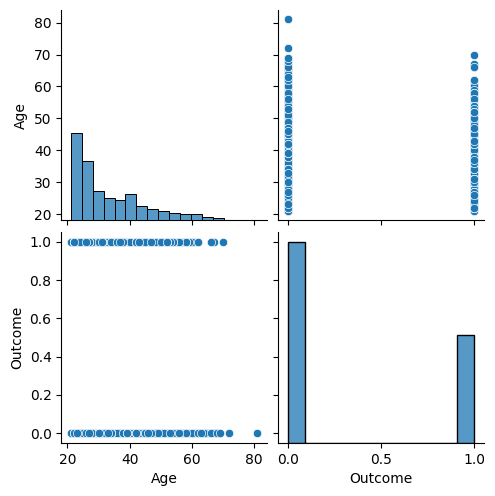

              Age   Outcome
Age      1.000000  0.238356
Outcome  0.238356  1.000000


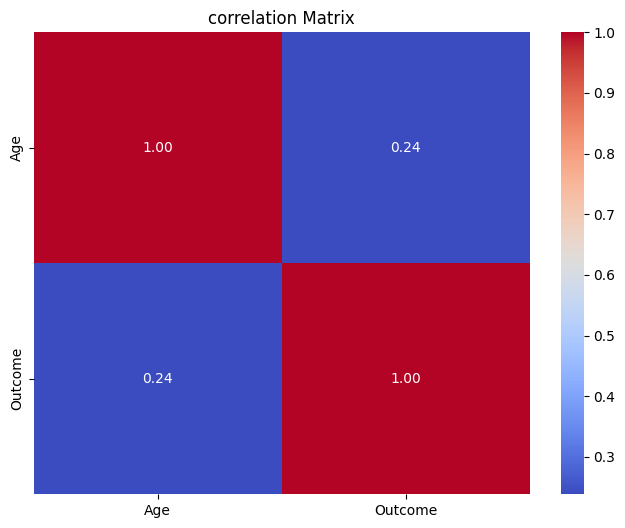

In [ ]:
sns.pairplot(mydata [['Pregnancies', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['Pregnancies', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()

sns.pairplot(mydata [['Glucose', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['Glucose', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()

sns.pairplot(mydata [['BloodPressure', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['BloodPressure', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()

sns.pairplot(mydata [['SkinThickness', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['SkinThickness', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()

sns.pairplot(mydata [['Insulin', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['Insulin', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()

sns.pairplot(mydata [['BMI', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['BMI', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()

sns.pairplot(mydata [['DiabetesPedigreeFunction', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['DiabetesPedigreeFunction', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()

sns.pairplot(mydata [['Age', 'Outcome']])
plt.show()
plt. figure(figsize=(8, 6))
corr_matrix = mydata[['Age', 'Outcome']]. corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation Matrix')
plt.show()


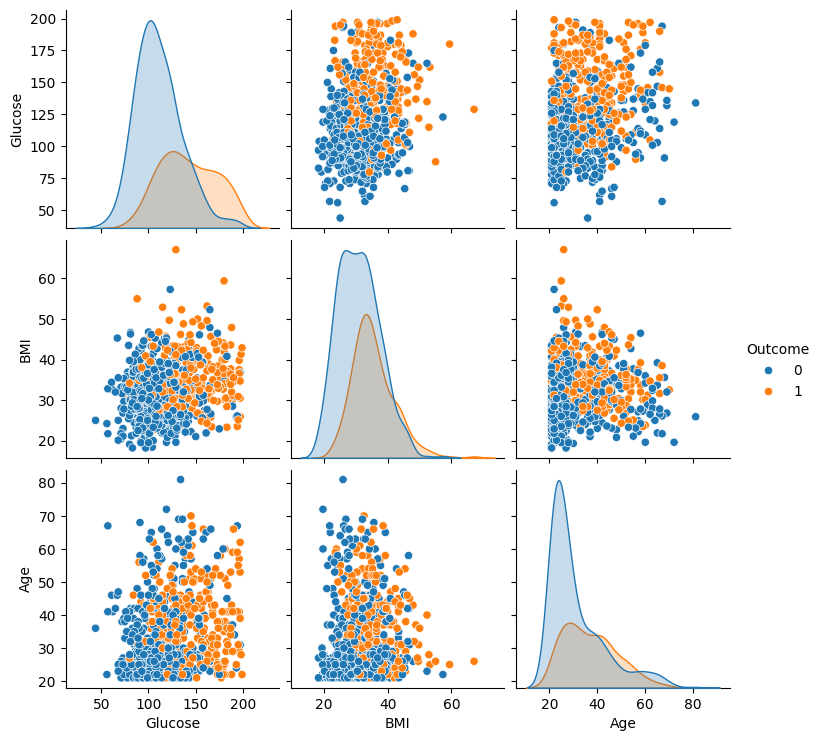

In [10]:
sns.pairplot(mydata, vars=['Glucose', 'BMI', 'Age'], hue='Outcome')
plt.show()

# Division en predictores y etiqueta / entrenamiento y prueba


In [11]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = mydata.drop(['Outcome'], axis=1)
y = mydata['Outcome']

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Escalamiento de los datos

In [12]:
from sklearn.preprocessing import StandardScaler
escalador=StandardScaler()
X_train_escalado=escalador.fit_transform(X_train)

# Instancia de clases(modelos) / Entrenamiento de modelos de clasificación

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
sgd_clf = SGDClassifier()
tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()

Para la realización del proyecto, se tomó la decisión de evaluar seis modelos en lugar de solo uno, esto
se basa en la necesidad de comparar distintos enfoques y aprovechar las fortalezas de cada uno. Cada
modelo de machine learning tiene sus propias ventajas y limitaciones, y en un problema tan crítico como
la predicción de diabetes, es esencial explorar varias alternativas para determinar cuál ofrece el mejor
equilibrio entre precisión, robustez y facilidad de interpretación. Algunos modelos, como la Regresión
4
Logística y el SVC, pueden dar resultados claros y bien definidos en casos lineales, mientras que otros,
como Random Forest y Árbol de Decisión, pueden manejar relaciones más complejas y no lineales en
los datos. Evaluando múltiples modelos, podemos identificar cual es el que mejor se adapta a nuestro
conjunto de datos específico y a la naturaleza de la predicción médica, asegurando así que el sistema sea
lo más confiable posible para un futuro y posible uso práctico en salud.
En el proyecto se dividió el dataset y se entrenó cada uno de los 6 modelos, los modelos elegidos a
evaluar son:
- Stochastic Gradient Descent
- Logistic Regresión
- Random Forest
- Suppor Vector Classifier
- K-Neighbors
- Decision Tree
Además, se consideró que cada uno de estos modelos tiene distintos supuestos asociados que deben
revisarse para que asegurar que los datos y en general el contexto cumplen con ellos, por ejemplo para
regresión logística se asume una relación lineal entre las características y la probabilidad de la variable
objetivo por lo que para validar este supuesto se calculó las respectivas correlaciones, aunque haya
modelos que se utilizaron como Random Forest y Decision Tree que capturan mejor la no linealidad y
son algo mas flexibles con respecto a esto, también está el caso de KNN(K-Nearest Neighbors) y
SGD(Stochastic Gradient Descent) en donde es ideal el normalizar los datos para un mejor rendimiento
del modelo, por ende esto también se realizó.

In [15]:
sgd_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [17]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
y_train_pred_tree = cross_val_predict(tree_clf, X_train, y_train, cv=5)
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5)
y_train_pred_svc = cross_val_predict(svc_clf, X_train, y_train, cv=5)
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_train, cv=5)
y_train_pred_lr = cross_val_predict(lr_clf, X_train, y_train, cv=5)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Evaluación de desempeño mediante Matriz de confusion

In [18]:
confusion_matrix(y_train, y_train_pred_sgd)

array([[282, 119],
       [ 99, 114]])

In [19]:
confusion_matrix(y_train, y_train_pred_tree)

array([[304,  97],
       [ 93, 120]])

In [20]:
confusion_matrix(y_train, y_train_pred_forest)

array([[344,  57],
       [ 87, 126]])

In [21]:
confusion_matrix(y_train, y_train_pred_svc)

array([[369,  32],
       [120,  93]])

In [22]:
confusion_matrix(y_train, y_train_pred_knn)

array([[325,  76],
       [ 93, 120]])

In [23]:
confusion_matrix(y_train, y_train_pred_lr)

array([[353,  48],
       [ 97, 116]])

Se evaluó y comparó la matriz de confusión, el recall y la precisión
para cada modelo. Estas métricas permitieron identificar no solo el modelo que tiene una mayor
precisión, sino que también equilibra bien los errores de falsos positivos y falsos negativos. Esto
es especialmente importante en el contexto de salud, donde es fundamental reducir los falsos
negativos para no pasar por alto posibles casos de diabetes ya que aumenta el riesgo de aumentar
el grado de la enfermedad o incluso de la muerte.

In [24]:
from sklearn.metrics import recall_score

In [25]:
recall_score(y_train, y_train_pred_sgd)

0.5352112676056338

In [26]:
recall_score(y_train, y_train_pred_tree)

0.5633802816901409

In [27]:
recall_score(y_train, y_train_pred_forest)

0.5915492957746479

In [28]:
recall_score(y_train, y_train_pred_svc)

0.43661971830985913

In [29]:
recall_score(y_train, y_train_pred_knn)

0.5633802816901409

In [30]:
recall_score(y_train, y_train_pred_lr)

0.5446009389671361

EL MEJOR MODELO HASTA AHORA ES RANDOM FOREST POR LO QUE SE PROCEDERÁ A AFINARLO
- El modelo Random Forest fue elegido por su robustez y su capacidad para manejar variables
correlacionadas y relaciones no lineales, algo crucial en datos de salud donde las interacciones entre
variables pueden ser complejas. Random Forest, al ser un método de ensamble, combina múltiples
árboles de decisión, reduciendo así la varianza del modelo y brindando mayor estabilidad y precisión en
las predicciones. A diferencia de métodos como la regresión logística, que puede tener limitaciones al
captar interacciones no lineales, o técnicas más complejas como redes neuronales, que requieren mayor
ajuste de parámetros, Random Forest proporciona un balance ideal entre simplicidad y rendimiento en
este proyecto introductorio. Esto permite un análisis confiable sin un alto riesgo de sobreajuste, siendo
además fácil de interpretar en un contexto clínico.


# Afinacion del modelo seleccionado con la cuadricula de hiperparametros

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'n_estimators': [1, 10, 100], 'criterion': ['gini', 'entropy'],\
             'max_depth': [None, 2, 3, 5,  7, 100], 'min_samples_split': [0.1, 1, 2, 3 ,4]}

In [34]:
cuadricula = GridSearchCV(forest_clf, param_grid, return_train_score= True , scoring='recall', cv= 5 )
cuadricula.fit(X_train_escalado, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 5, 7, 100],
                         'min_samples_split': [0.1, 1, 2, 3, 4],
                         'n_estimators': [1, 10, 100]},
             return_train_score=True, scoring='recall')

In [35]:
cuadricula.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 1}

In [36]:
mejor_modelo = cuadricula.best_estimator_

In [37]:
mejor_modelo.score(X_train_escalado, y_train)

0.8436482084690554

post afinacion del modelo random forest, mejoró de un 0,59 app a 0,84 app

# curva ROC-AUC

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


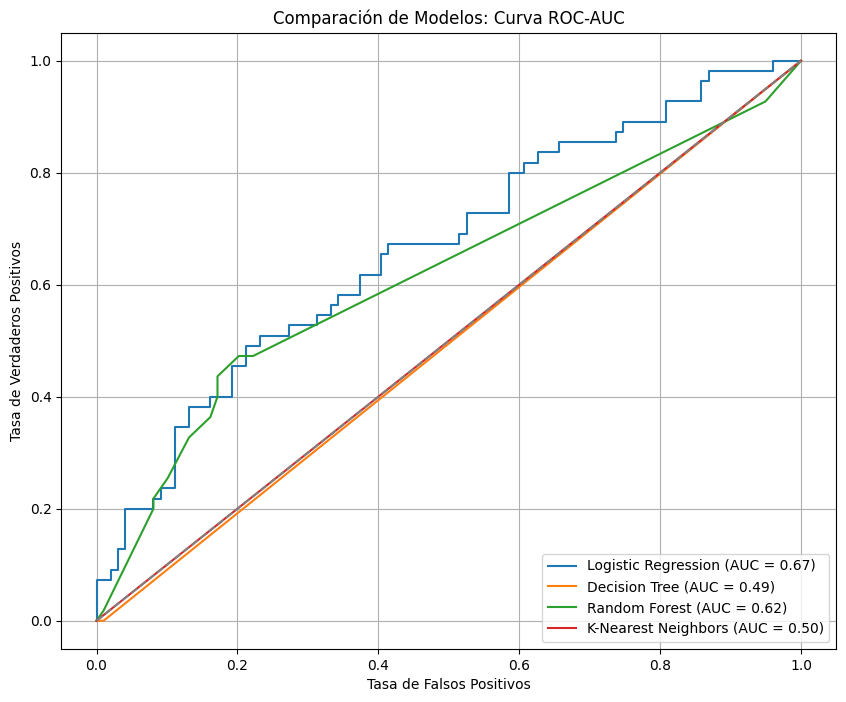

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Lista de modelos que has entrenado
models = {
    'Logistic Regression': lr_clf,
    'Decision Tree': tree_clf,
    'Random Forest': forest_clf,
    #'SVM': SVC(probability=True),
    'K-Nearest Neighbors': knn_clf
}

# Graficar la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Obtener probabilidades de predicción
    y_prob = model.predict_proba(X_test_escalado)[:, 1]
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Graficar la línea de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Configuración del gráfico
plt.title('Comparación de Modelos: Curva ROC-AUC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [48]:
cuadriculalr = LogisticRegression(C=1.0, class_weight='balanced', fit_intercept=True, max_iter=100, multi_class='ovr', penalty='l2', random_state=42, solver='lbfgs', tol=1e-4, verbose=0, warm_start=False)

cuadriculalr.fit(X_train_escalado, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=42)

Gracias a la curva, se ha identificado que el numero mas alto y el que se se considera el mejor en términos de capacidad de discriminación es el del modelo Logistic Regression por lo que se procederá a afinar dicho modelo y aumentar su precisión en el contexto de lo abordado.

In [62]:

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=lr_clf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train_escalado, y_train)



Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc', verbose=2)

In [64]:

best_lr_model = grid_search.best_estimator_
print("Mejores parámetros para Logistic Regression:", grid_search.best_params_)


from sklearn.metrics import roc_auc_score


y_prob_best = best_lr_model.predict_proba(X_test_escalado)[:, 1]
auc_best = roc_auc_score(y_test, y_prob_best)
print(f"AUC del mejor modelo ajustado de Logistic Regression: {auc_best:.2f}")



Mejores parámetros para Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
AUC del mejor modelo ajustado de Logistic Regression: 0.82


Post afinacion del modelo LR, ha aumentado su precision a un 0,82 el cual es mas cercano a 1 y por lo tanto mejor en terminos de discriminación en un problema de clasificación como este.

# Recomendaciones

- Mejor Modelo Identificado:

Según los resultados, parece que la regresión logística optimizada con GridSearchCV mostró un buen rendimiento en términos de AUC (Área bajo la curva ROC). Esto sugiere que es adecuado priorizar este modelo en el despliegue, especialmente si se busca un balance entre sensibilidad y especificidad.

 - Enfoque en Recall (Sensibilidad):

Dado que el objetivo del modelo es predecir diabetes, es crítico minimizar los falsos negativos (es decir, pacientes con diabetes no identificados). Esto podría requerir ajustar el umbral de decisión del modelo (por ejemplo, de 0.5 a un valor más bajo) para mejorar el recall.

- Análisis Comparativo de Modelos:

Si otros modelos como el Random Forest o el K-Nearest Neighbors (KNN) tuvieron métricas competitivas (ej. precisión o recall), se podría evaluar su combinación mediante un enfoque de ensamblado para aprovechar las fortalezas de cada uno.

- Optimización Adicional:

Considerar optimizar modelos adicionales como Árboles de Decisión o SVM para evaluar su potencial. Aunque los resultados iniciales indican que no son los más adecuados, podrían mejorar con ajustes en sus hiperparámetros.


- Crear variables derivadas basadas en relaciones clínicas conocidas, como:

El cociente entre insulina y glucosa.
Clasificación de IMC en categorías (normal, sobrepeso, obesidad).
Promedios móviles de glucosa si se tienen registros temporales.